<b>H0:</b> The average sales price of houses with Air Condition is same as those without<br>
<b>H1:</b> The average sales price of houses with air condition is not same as those without<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\anchi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
ames = pd.read_csv("https://raw.githubusercontent.com/Padre-Media/dataset/main/Ames.csv")
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2579 non-null   int64  
 1   GrLivArea      2579 non-null   int64  
 2   SalePrice      2579 non-null   int64  
 3   MSSubClass     2579 non-null   int64  
 4   MSZoning       2579 non-null   object 
 5   LotFrontage    2117 non-null   float64
 6   LotArea        2579 non-null   int64  
 7   Street         2579 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2579 non-null   object 
 10  LandContour    2579 non-null   object 
 11  Utilities      2579 non-null   object 
 12  LotConfig      2579 non-null   object 
 13  LandSlope      2579 non-null   object 
 14  Neighborhood   2579 non-null   object 
 15  Condition1     2579 non-null   object 
 16  Condition2     2579 non-null   object 
 17  BldgType       2579 non-null   object 
 18  HouseSty

In [4]:
ames['CentralAir'].value_counts()

CentralAir
Y    2416
N     163
Name: count, dtype: int64

In [5]:
ac_prices = ames.loc[ames['CentralAir'] == 'Y', 'SalePrice']
no_ac_prices = ames.loc[ames['CentralAir'] == 'N', 'SalePrice']

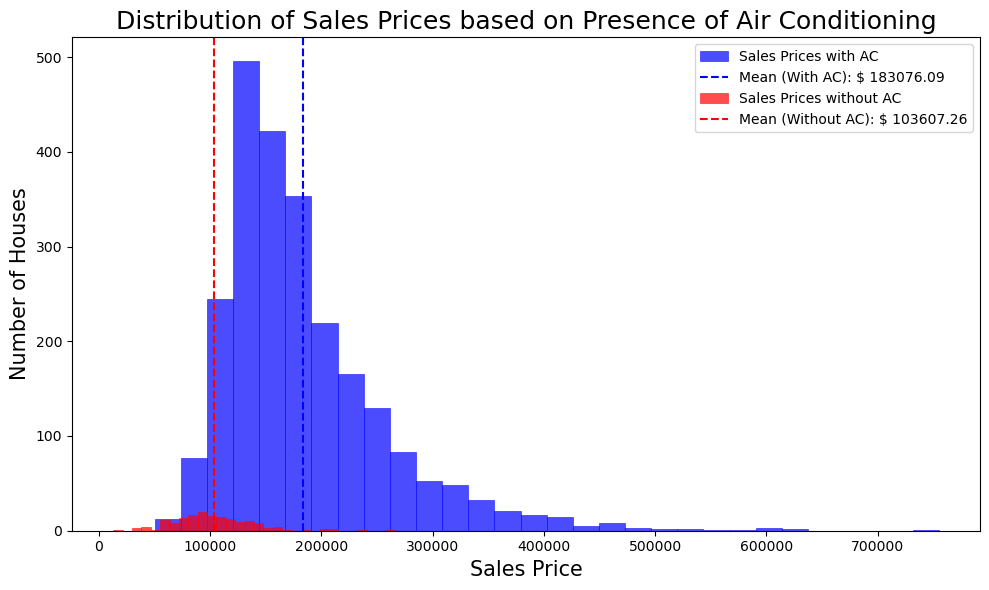

In [7]:
plt.figure(figsize=(10, 6))

# Histograms for sales prices based on air conditioning
# Plotting 'With AC' first for the desired order in the legend

plt.hist(ac_prices, bins=30, alpha=0.7, color='blue',
         edgecolor='blue', lw=0.5, label='Sales Prices with AC')
mean_ac = np.mean(ac_prices)
plt.axvline(mean_ac, color='blue', linestyle='dashed', linewidth=1.5,
           label=f'Mean (With AC): ${mean_ac: .2f}')

plt.hist(no_ac_prices, bins=30, alpha=0.7, color='red',
         edgecolor='red', lw=0.5, label='Sales Prices without AC')
mean_no_ac = np.mean(no_ac_prices)
plt.axvline(mean_no_ac, color='red', linestyle='dashed', linewidth=1.5,
           label=f'Mean (Without AC): ${mean_no_ac: .2f}')

plt.title('Distribution of Sales Prices based on Presence of Air Conditioning', fontsize=18)
plt.xlabel('Sales Price', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [8]:
from scipy import stats

In [9]:
t_stat, p_value = stats.ttest_ind(ac_prices, no_ac_prices, equal_var=False)

if p_value < 0.05:
    result = "reject the null hypothesis"
else:
    result = "failed to reject the null hypothesis"
    
print(f"With a p-value of {p_value}, We {result}")

With a p-value of 2.039031727317571e-65, We reject the null hypothesis


Change the Alternate Hypothesis to more meaningful with "The average sale price of houses with air conditioning is more than those without

In [10]:
t_stat, p_value = stats.ttest_ind(ac_prices, no_ac_prices,
                                  equal_var=False, alternative="greater")

if p_value < 0.05:
    result = "reject the null hypothesis"
else:
    result = "failed to reject the null hypothesis"
    
print(f"With a p-value of {p_value}, We {result}")

With a p-value of 1.0195158636587854e-65, We reject the null hypothesis


In [11]:
wilk_stats, p_value = stats.wilcoxon(x = ac_prices, y = no_ac_prices, alternative="greater")
if p_value < 0.05:
    result = "reject the null hypothesis"
else:
    result = "failed to reject the null hypothesis"
    
print(f"With a p-value of {p_value}, We {result}")

ValueError: The samples x and y must have the same length.